Risk Off Strategy
=================

In [1]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    tickers = pd.read_csv("/app/docs/tutorial/tickers.csv")
    loader = Loader()
    for row in tqdm(tickers.to_dict('record')):
        loader.get(row['Ticker'], expense_ratio=row['ExpenseRatio'] * 0.01)
    loader.save('/app/docs/tutorial/all.bin')

In [2]:
loader = Loader.load('/app/docs/tutorial/all.bin')
loader = loader.since(datetime(2007, 1, 1))
market = loader.get_market()

selected_tickers = ['SPY', 'QQQ', 'TLT', 'IEF', 'GLD']

In [3]:
from mypo import split_k_folds
from mypo.optimizer import NoOptimizer, RiskParityOptimizer
from mypo.rebalancer import MonthlyRebalancer
from mypo.evacuator import CovarianceEvacuator, MovingAverageEvacuator
from mypo import Runner

folds = split_k_folds(market, 1, 200)
fold = folds[0].filter(selected_tickers)

Reference Performance (SPY)
----------------------------------------

100%|██████████| 3416/3416 [00:46<00:00, 74.19it/s]


                     tickers  yearly total return  sharpe ratio  \
0  [TLT, GLD, QQQ, SPY, IEF]             1.081401      0.313451   

   max draw down  max draw down span  
0       0.452531                1318  


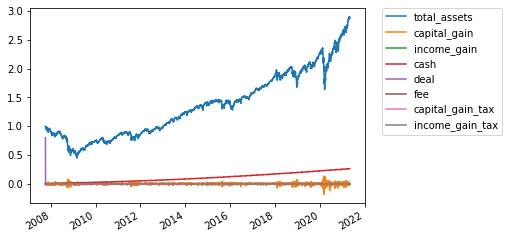

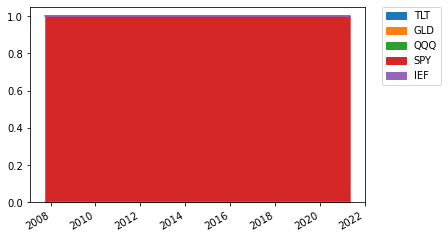

In [4]:
optimizer = NoOptimizer([1, 0, 0, 0, 0])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


RiskParityOptimizer without filter
--------------------

100%|██████████| 3416/3416 [00:46<00:00, 73.81it/s]


                     tickers  yearly total return  sharpe ratio  \
0  [TLT, GLD, QQQ, SPY, IEF]             1.065496      0.757629   

   max draw down  max draw down span  
0       0.882856                 265  


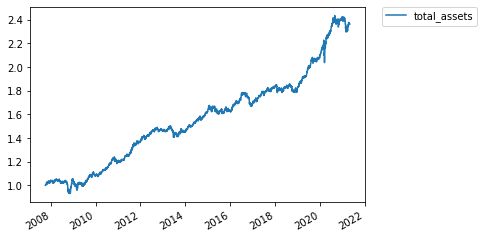

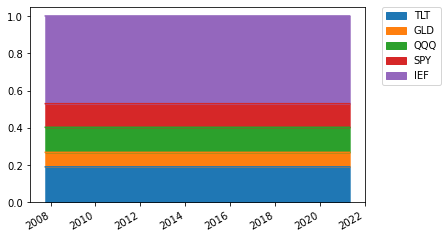

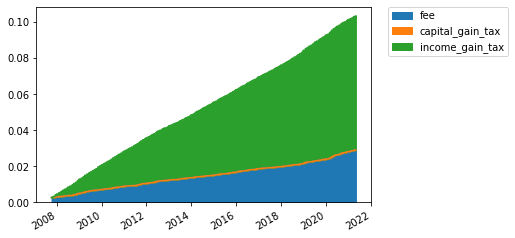

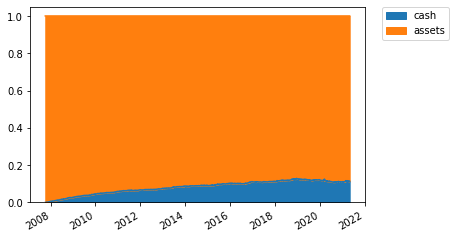

In [5]:
optimizer = RiskParityOptimizer(risk_target=[0.2, 0.25, 0.2, 0.25, 0.1])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


RotationStrategy with cash filter (Covariance)
----------------------------------------

100%|██████████| 3416/3416 [01:22<00:00, 41.61it/s]


                     tickers  yearly total return  sharpe ratio  \
0  [TLT, GLD, QQQ, SPY, IEF]             1.043146      0.413398   

   max draw down  max draw down span  
0       0.885693                 415  


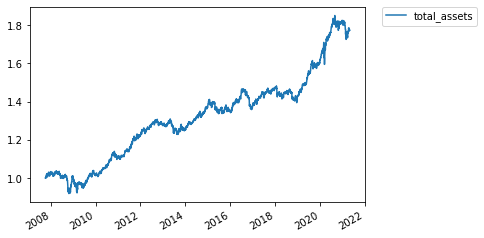

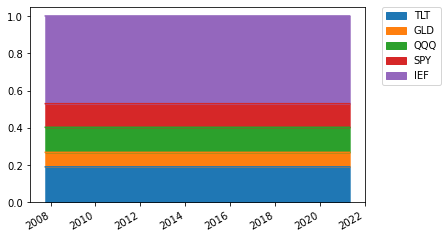

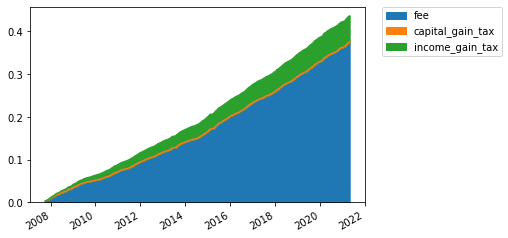

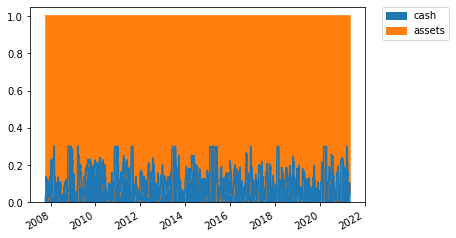

In [6]:
optimizer = RiskParityOptimizer(risk_target=[0.2, 0.25, 0.2, 0.25, 0.1])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=CovarianceEvacuator(long_span=250, short_span=20, factor=0.3)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


RiskParityOptimizer with cash filter (Moving Average)
----------------------------------------

In [ ]:
optimizer = RiskParityOptimizer(risk_target=[0.2, 0.25, 0.2, 0.25, 0.1])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=MovingAverageEvacuator(span=150, risk_off=0.9)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


 41%|████      | 1401/3416 [00:31<00:47, 42.79it/s]